## IMEX midpoint method (s,$\sigma$,p) = (1,2,2)

The explicit midpoint method butcher table is(with $s$ stages):

| $\hat{c}$ | $\hat{a}$          |         |
|-----------|--------------------|----------|
| $0_1$     | $0_{11}$           | $0_{12}$ |
| $\frac{1}{2}_2$     | $\frac{1}{2}_{21}$ | $0_{22}$ |
| $\hat{b}$  | $0_1$              | $1_2$    |


and the implicit midpoint method butcher table is:

| 1/2 | 1/2 |
| - | - |
|     | 1 |

which on padding results in the following (with $\sigma = s+1$ stages):

| $c$ | $a$          |         |
|-----------|--------------------|----------|
| $0_0$     | $0_{00}$           | $0_{01}$ |
| $\frac{1}{2}_1$     | $0_{10}$ | $0_{11}$ |
| $b$  | $0_0$              | $1_1$    |

Set $\hat{k_1} = f(u_0)$

For $i = 1,2...s$,

$K_i = g(u_i) \Rightarrow K_1 = g(u_1)$ since $s=1$.

where,

$$u_i = u_0 + h \sum_{j=1}^{i} a_{i,j} K_j + h h \sum_{j=1}^{i} \hat{a_{i,j}} \hat{K_j} $$

$$\Rightarrow u_1 = u_0 + h(a_{11}K_1 + h(\hat{a_{21}} \hat{K_1})$$
$$\Rightarrow u_1 = u_0 + \frac{h}{2}(K_1 + \hat{K_1})$$

$$\boxed {\Rightarrow u_1 = u_0 + h(g(u_1) + f(u_0)}$$

Evaluate $\hat{K_{i+1}} = f(u_i)$,
$$K_2 = f(u_1)$$

Finally,

$$u_{n+1} = u_0 + h \sum_{j=1}^{s} b_j K_j + h h \sum_{j=1}^{\sigma} \hat{b_j} \hat{K_j}$$

For $s=1, \sigma = 2$,
$$\Rightarrow u_{n+1} = u_0 + h(b_1 K_1) + h(\hat{b_1} \hat{K_1} + \hat{b_2} \hat{K_2})$$
$$\Rightarrow u_{n+1} = u_0 + h(K_1 + \hat{K_2}) $$

$$\boxed {\Rightarrow u_{n+1} = u_0 + h(g(u_1) + f(u_1))} $$


## System of two pendulums


We have a two pendulum system with spring constants $k_x$ and $k_y$ coupled together by a factor $q$:

$$ \frac{d^2 x(t)}{dt^2} = \ddot{x}(t)= -k_x x(t)$$
$$\ddot{y}(t) + q(\dot{y}(t) - \dot{x}(t)) + k_y y(t) = 0$$

decomposing into 1st order, coupled differential equation:

$$\dot{x} = v $$,
$$\dot{v} = -k_x x$$,
$$\dot{y} = v - q (y - x)$$,
$$\dot{w}  = -k_y y$$

which are then solved numerically with initial conditions:

$$x(t) \rightarrow x(0) = 1, \dot{x}(0) = 0$$,
$$y(t) \rightarrow y(0) = 1, \dot{y}(0) = 0$$


The analytical solutions to these equations with above mentioned initial conditions are:

$$x(t) = \cos{\left(\sqrt{k_x}t\right)}$$,
$$y(t) = \frac{1}{(k_x-k_y)^2+k_x q^2} \left[ q \left(\frac{\left(k_y^2-k_x^2\right) e^{-\frac{1}{2} (q t)} \sinh \left(\frac{1}{2} t \sqrt{q^2-4 k_y}\right)}{\sqrt{q^2-4 k_y}} + \\ \sqrt{k_x} (k_x-k_y) \sin \left(\sqrt{k_x} t\right)+k_x q \cos \left(\sqrt{k_x} t\right)\right)+(k_x-k_y)^2 e^{-\frac{1}{2} (q t)} \cosh \left(\frac{1}{2} t \sqrt{q^2-4 k_y}\right) \right]$$


For $y(t)$ to be a real valued function, the condition to be satisfied is:

$$\left(q^2 - 4 k_y\right) \geq 0$$

## Solving system of two pendulums with midpoint IMEX method - (1,2,2)

Consider the state vector $u$ as system o differential variables:

$$u = 
\begin{pmatrix}
x \\
v \\
w \\
y
\end{pmatrix}$$

with,
$$f(u) = \begin{pmatrix}
v \\
-k_x x \\
-k_y y \\
w
\end{pmatrix} \ \text{and} \ g(u) = \begin{pmatrix}
0 \\
0 \\
0 \\
-q(y - x)
\end{pmatrix}$$

In [1]:
import numpy as np
import sympy as sp
from sympy.utilities.lambdify import lambdify
import matplotlib.pyplot as plt

In [2]:
#IMEX midpoint method(2nd order)


y1,y0,x1,x0,v1,v0,w1,w0 = sp.symbols("y_{n+1} y_n x_{n+1} x_n v_{n+1} v_n w_{n+1} w_n")
kx,ky,q,h = sp.symbols("k_x k_y q h")

u_n = [x0,v0,w0,y0]
u_np1 = [x1,v1,w1,y1]

def u(x,v,w,y):
    return x,v,w,y

def func_fu(x,v,w,y):
    xdot = v
    vdot = -kx*x
    ydot = w
    wdot = -ky*y
    return xdot,vdot,wdot,ydot

def func_gu(x,y):
    xdot = 0
    vdot = 0
    ydot = -q*(y - x)
    wdot = 0
    return xdot,vdot,wdot,ydot

def func_u1(n_arr,np1_arr):
    u0 = u(n_arr[0],n_arr[1],n_arr[2],n_arr[3])
    u1 = u(np1_arr[0],np1_arr[1],np1_arr[2],np1_arr[3])
    fu0 = list(func_fu(n_arr[0],n_arr[1],n_arr[2],n_arr[3]))
    gu1 = list(func_gu(np1_arr[0],np1_arr[3]))
    u1_func = [np.nan,np.nan,np.nan,np.nan]
    for i in range (len(n_arr)):
        u1_func[i] = -u1[i] + u0[i] + (h/2)*(fu0[i] + gu1[i]) # u1_func = 0 = -u1 +u0 + h/2(fu0 + gu1)
    return u1_func

u1_rhs = [np.nan,np.nan,np.nan,np.nan]
for i in range (len(u_n)):
    u1_rhs[i] = sp.linsolve([func_u1(u_n,u_np1)[i]],(u_np1[i])).args[0][0]
    
def u_np1_rhs(n_arr):
    u0 = u(n_arr[0],n_arr[1],n_arr[2],n_arr[3])
    gu1 = list(func_gu(u1_rhs[0],u1_rhs[3]))
    fu1 = list(func_fu(u1_rhs[0],u1_rhs[1],u1_rhs[2],u1_rhs[3]))
    u_np1_func = [np.nan,np.nan,np.nan,np.nan]
    for i in range (len(n_arr)):
        u_np1_func[i] = u0[i] + h*(fu1[i] + gu1[i])
    return u_np1_func


x_imex = lambdify([x0,v0,w0,y0,x1,v1,w1,y1,kx,ky,q,h],u_np1_rhs(u_n)[0])
v_imex = lambdify([x0,v0,w0,y0,x1,v1,w1,y1,kx,ky,q,h],u_np1_rhs(u_n)[1])
w_imex = lambdify([x0,v0,w0,y0,x1,v1,w1,y1,kx,ky,q,h],u_np1_rhs(u_n)[2])
y_imex = lambdify([x0,v0,w0,y0,x1,v1,w1,y1,kx,ky,q,h],u_np1_rhs(u_n)[3])

In [3]:
kx_n = 1.0 #Pendulum 1 spring constant
ky_n = 1.1 #Pendulum 2 spring constant
#NOTE: analytical solution can't calculated for q=0, this code is incapable!!
q_n = 20.0 #Coupling factor 

#Note!! If initial data is to be changed, compute analytical solution
#in Mathematica with respective initial data and make changes to analytic solution defined here.
#------DO NOT CHANGE THIS------------------
x_0 = 1 # initial position - pendulum 1
v_0 = 0 # initial velocity - pendulum 1
y_0 = 1 # initial position - pendulum 2
w_0 = 0 # initial velocity - pendulum 2
#-----------------------------------------

#check if determinant > 0
if (q_n**2 < 4*ky_n):
    print("Discriminant \sqrt{q^2 - 4k2} < 0. Increase the value of 'q'")
else:
    print("Discriminant condition satisfied")

Discriminant condition satisfied


In [4]:
#Initial data
h_list = ([0.1,0.25])
t_start = 0
t_end = 30

#--------------------------------------------------------------------
N = int((t_end)/np.min(h_list))
X = np.empty((N,len(h_list)))
X [:] = np.nan
V = np.empty((N,len(h_list)))
V [:] = np.nan
Y = np.empty((N,len(h_list)))
Y[:] = np.nan
W = np.empty((N,len(h_list)))
W[:] = np.nan
T=np.empty((N,len(h_list)))
T[:] = np.nan


def plots(title,x_label,y_label,l1_title,l2_title,x_param,y_param1,y_param2):
    plt.figure(figsize=(15,7.5))
    plt.title(title,fontsize=15)
    plt.xlabel(x_label,fontsize=16)
    plt.ylabel(y_label,fontsize=16)
    l1 = plt.plot(x_param,y_param1)
    l2 = plt.plot(x_param,y_param2,linestyle='--')
    leg1 = plt.legend(l1,h_list,title=l1_title,fontsize=12,loc =4)
    plt.gca().add_artist(leg1)
    leg2 = plt.legend(l2,h_list,title=l2_title,fontsize=12,loc =1)
    plt.gca().add_artist(leg2)
    plt.show()


X_a = np.zeros((N,len(h_list)))
delX = np.zeros((N,len(h_list)))
Y_a = np.zeros((N,len(h_list)))
delY = np.zeros((N,len(h_list)))

diff_k1k2 = kx_n - ky_n
detm = np.sqrt(q_n**2 - 4*ky_n)
def y_analytic(time):
    y =  ( ( q_n*( ((np.exp(-0.5*q_n*time)*np.sinh(0.5*time*detm)*(ky_n**2 - kx_n**2))/detm) 
         + (np.sqrt(kx_n)*np.sin(np.sqrt(kx_n)*time)*diff_k1k2)
         + (kx_n*q_n*np.cos(np.sqrt(kx_n)*time))) 
         + (np.exp(-0.5*q_n*time)*np.cosh(0.5*time*detm)*(diff_k1k2)**2) ) / ((diff_k1k2**2) + kx_n*q_n**2) )
    return y

def x_analytic(time):
    x = np.cos(np.sqrt(kx_n)*time)
    return x

In [5]:
#loop to calculate numerical and analytical solution 
for i in range (len(h_list)):
    for j in range (int((t_end)/h_list[i])-1):
        if(j==0):
            t = np.arange(t_start,t_end,h_list[i]) # (initial time, final time, time step size)
            X[j,i] = x_0
            V[j,i] = v_0
            W[j,i] = w_0
            Y[j,i] = y_0
        X[j+1,i] = x_imex(X[j,i],V[j,i],W[j,i],Y[j,i],
                          X[j+1,i],V[j+1,i],W[j+1,i],Y[j+1,i],kx_n,ky_n,q_n,h_list[i])
        V[j+1,i] = v_imex(X[j,i],V[j,i],W[j,i],Y[j,i],
                          X[j+1,i],V[j+1,i],W[j+1,i],Y[j+1,i],kx_n,ky_n,q_n,h_list[i])
        W[j+1,i] = w_imex(X[j,i],V[j,i],W[j,i],Y[j,i],
                          X[j+1,i],V[j+1,i],W[j+1,i],Y[j+1,i],kx_n,ky_n,q_n,h_list[i])
        Y[j+1,i] = y_imex(X[j,i],V[j,i],W[j,i],Y[j,i],
                          X[j+1,i],V[j+1,i],W[j+1,i],Y[j+1,i],kx_n,ky_n,q_n,h_list[i])
        T[j,i] = t[j]
        # Calculating analytical solution for array of time - t:
        X_a[j,i] = x_analytic(T[j,i])
        Y_a[j,i] = y_analytic(T[j,i])
        #Error calculation:
        delX[j,i] = np.abs((X_a[j,i]-X[j,i])/h_list[i]**2)
        delY[j,i] = np.abs((Y_a[j,i]-Y[j,i])/h_list[i]**2)

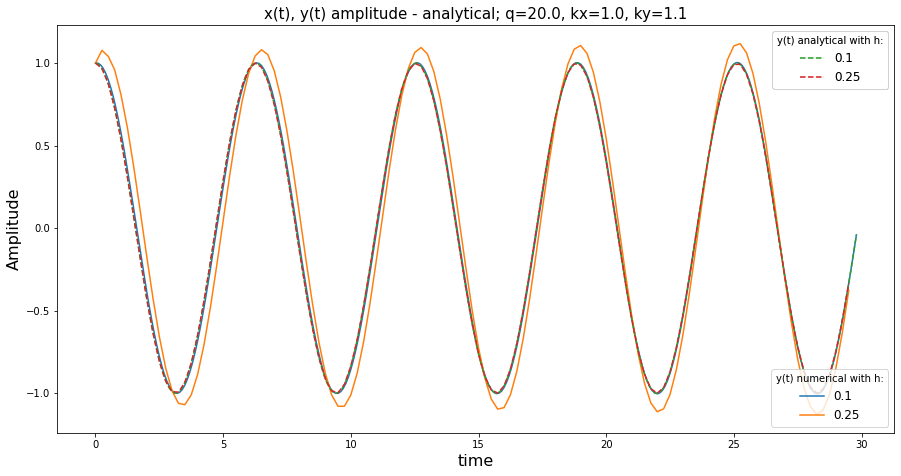

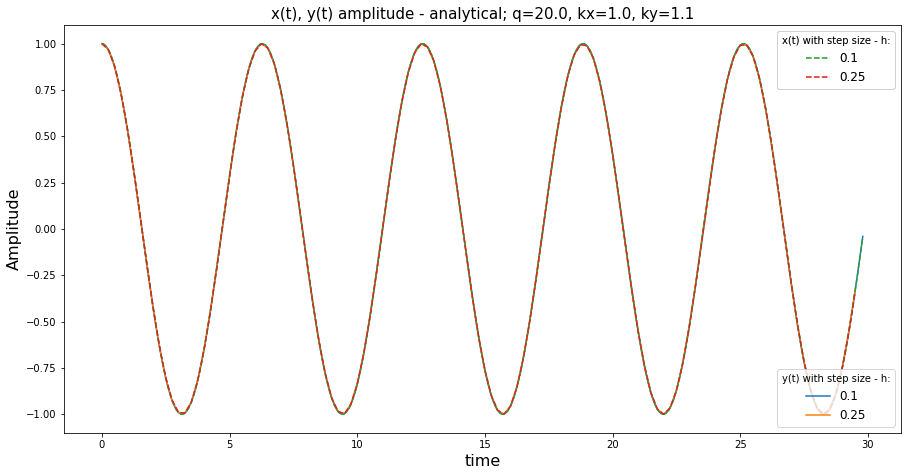

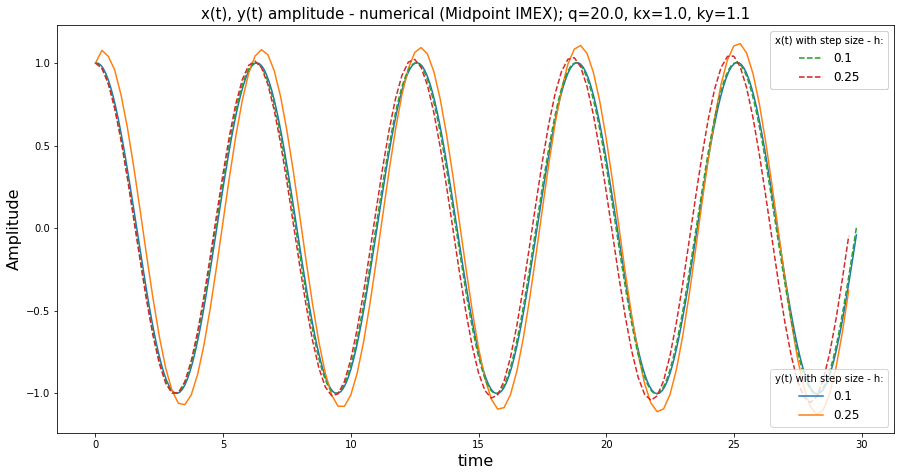

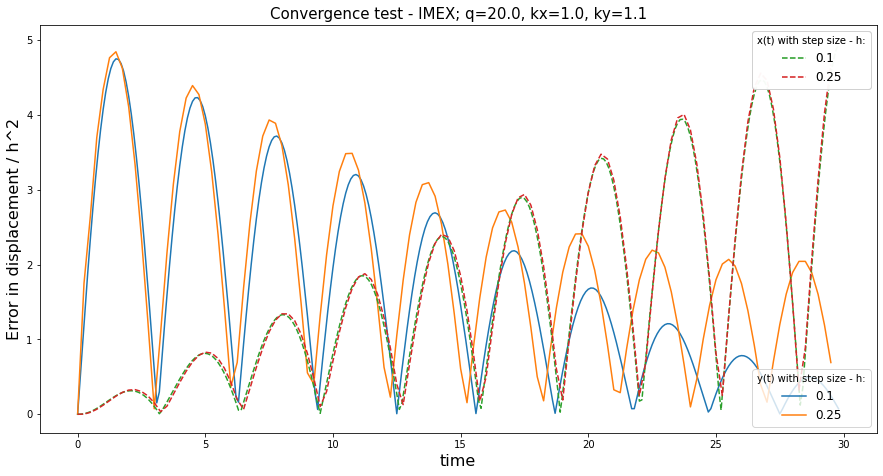

In [6]:
#plots
plots("x(t), y(t) amplitude - analytical; q=%0.1f, kx=%0.1f, ky=%0.1f"%(q_n,kx_n,ky_n),"time","Amplitude","y(t) numerical with h:","y(t) analytical with h:",T,Y,Y_a)
plots("x(t), y(t) amplitude - analytical; q=%0.1f, kx=%0.1f, ky=%0.1f"%(q_n,kx_n,ky_n),"time","Amplitude","y(t) with step size - h:","x(t) with step size - h:",T,Y_a,X_a)
plots("x(t), y(t) amplitude - numerical (Midpoint IMEX); q=%0.1f, kx=%0.1f, ky=%0.1f"%(q_n,kx_n,ky_n),"time","Amplitude","y(t) with step size - h:","x(t) with step size - h:",T,Y,X)
plots("Convergence test - IMEX; q=%0.1f, kx=%0.1f, ky=%0.1f"%(q_n,kx_n,ky_n),"time","Error in displacement / h^2","y(t) with step size - h:","x(t) with step size - h:",T,delY,delX)